# Indian Election Analysis

India's lower house of Parliament,the Lok Sabha, has 543 seats in total.Members of Lok Sabha (House of the People) or the lower house of India's Parliament are elected by being voted upon by all adult citizens of India, from a set of candidates who stand in their respective constituencies. Every adult citizen of India can vote only in their constituency. Candidates who win the Lok Sabha elections are called 'Member of Parliament' and hold their seats for five years or until the body is dissolved by the President on the advice of the council of ministers.

There are more than 700 million voters with more than 800,000 polling stations.

The Lok Sabha election is a very complex affair as it involves a lot of factors. It is this very fact that makes it a perfect topic to analyze.

Currently there are two major parties in India, Bhartiya Janta Party(BJP) and Indian National Congress(INC).

As India is country of diversities, and each region is very different from every other region, there are a lot of regional or state parties having major influences. These parties can either support any of the alliance to make a government or can stay independent.

There are two major alliances, the NDA led by BJP and the UPA led by INC.

## About the data set

### There are two datasets:

#### 1. 2009 Candidate dataset:

The candidate dataset has 15 features namely  'ST_CODE', 'State_name', 'Month', 'Year', 'PC_Number', 'PC_name', 'PC_Type', 'Candidate_Name', 'Candidate_Sex', 'Candidate_Category', 'Candidate_Age', 'Party_Abbreviation', 'Total_Votes_Polled', 'Position','Alliance'.

#### 2. 2009 Electors dataset

The elector dataset consist of 8 features namely 'STATE CODE', 'STATE', 'PC NO', 'PARLIAMENTARY CONSTITUENCY','Total voters', 'Total_Electors', 'TOT_CONTESTANT', 'POLL PERCENTAGE'.

## Loading necessary Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read both the datasets
electors_2009 = pd.read_csv("../data/LS2009Electors.csv")
candidate_2009 = pd.read_csv("../data/candidate09.csv")

In [3]:
electors_2009.head()

,STATE CODE,STATE,PC NO,PARLIAMENTARY CONSTITUENCY,Total voters,Total_Electors,TOT_CONTESTANT,POLL PERCENTAGE
0,S01,Andhra Pradesh,1,Adilabad,864165,1131211,9,76.39
1,S01,Andhra Pradesh,2,Peddapalle,905332,1315642,15,68.81
2,S01,Andhra Pradesh,3,Karimnagar,990646,1496211,15,66.21
3,S01,Andhra Pradesh,4,Nizamabad,891508,1333271,12,66.87
4,S01,Andhra Pradesh,5,Zahirabad,1017372,1359566,10,74.83


In [4]:
candidate_2009.head()

,ST_CODE,State_name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_Votes_Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP


In [5]:
electors_2009.isnull().sum()

STATE CODE                    0
STATE                         0
PC NO                         0
PARLIAMENTARY CONSTITUENCY    0
Total voters                  0
Total_Electors                0
TOT_CONTESTANT                0
POLL PERCENTAGE               0
dtype: int64

In [6]:
candidate_2009.isnull().sum()

ST_CODE               0
State_name            0
Month                 0
Year                  0
PC_Number             0
PC_name               0
PC_Type               0
Candidate_Name        0
Candidate_Sex         0
Candidate_Category    0
Candidate_Age         0
Party_Abbreviation    0
Total_Votes_Polled    0
Position              0
Alliance              0
dtype: int64

## Task 1 : Plot a bar chart to compare the number of male and female candidates in the election

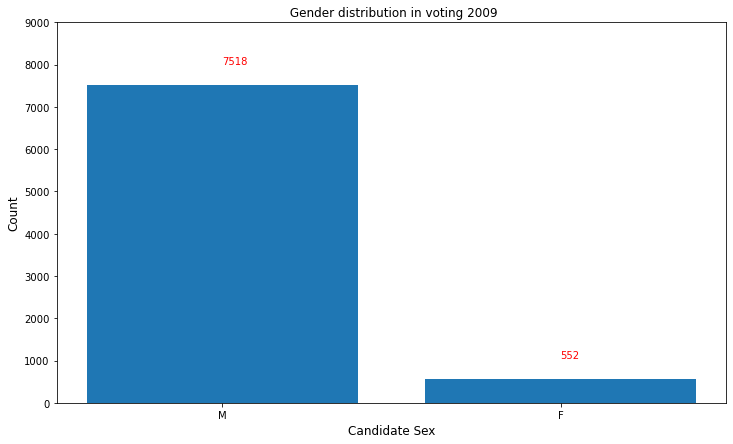

In [7]:
# Finding the value counts of both the genders

# Stroing the counts in a variable  
gender_counts = pd.DataFrame(candidate_2009.Candidate_Sex.value_counts())
gender_counts
fig = plt.figure(figsize = (12,7))
plt.bar(height = gender_counts['Candidate_Sex'], x = gender_counts.index)

for num, val in enumerate(gender_counts['Candidate_Sex'].values):
    plt.text(x = num, y= val +500, s = str(val), color = 'r')

plt.xlabel('Candidate Sex', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.ylim(0,9000)
plt.title(' Gender distribution in voting 2009')
plt.show()
# Plotting a bar graph


### Insight : As can be seen that the number of female candidates in the elections are significantly less.

## Task 2 : Plot a histogram of the age of all the candidates as well as of the winner amongst them. Compare them and note an observation

Text(0.5, 1.0, 'Winner Candidates')

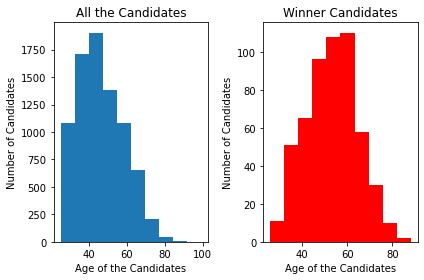

In [8]:
# Selecting the subset of the data with winner candidates
winner = candidate_2009[candidate_2009.Position == 1]

# Histogram of the age of all the candidates

fig,ax = plt.subplots(nrows=1,ncols=2,tight_layout = True)

ax[0].hist(list(candidate_2009.Candidate_Age),bins = 10)
ax[0].set_xlabel('Age of the Candidates')
ax[0].set_ylabel('Number of Candidates')
ax[0].set_title('All the Candidates')

ax[1].hist(list(winner.Candidate_Age),bins = 10,color = 'red')
ax[1].set_xlabel('Age of the Candidates')
ax[1].set_ylabel('Number of Candidates')
ax[1].set_title('Winner Candidates')

### Insight : Most of the candidates are of the in the age bracket of 40 - 50 but the age bracket of winner candidates is between 50-70.

## Task 3 : Plot a bar graph to get the vote shares of different parties

Text(0.5, 1.0, 'Vote Shares')

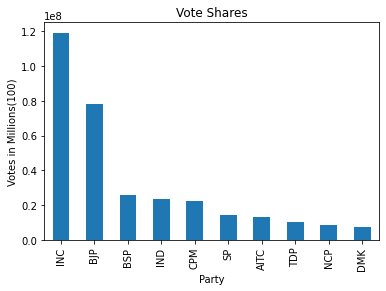

In [9]:
# Group the dataframe by 'Party_Abbreviation' and sum the 'Total _Votes_Polled'
vote_share = candidate_2009.groupby('Party_Abbreviation')['Total_Votes_Polled'].sum()

# Plot the vote share with respect to different parties
party_vote_share = vote_share.sort_values(ascending=False)[:10].plot(kind='bar')
party_vote_share.set_xlabel('Party')
party_vote_share.set_ylabel('Votes in Millions(100)')
party_vote_share.set_title('Vote Shares')

### Insight : The vote share of Indian National Congres(INC) is highest followed by the Bhartiya Janta Party(BJP). The intresting observation here is the Bahujan Samaj Party(BSP) despite being a regional party has the third highest number of vote share.

## Task 4 : Plot a barplot to compare the mean poll percentage of all the states

<AxesSubplot:xlabel='Poll_Percentage', ylabel='STATE'>

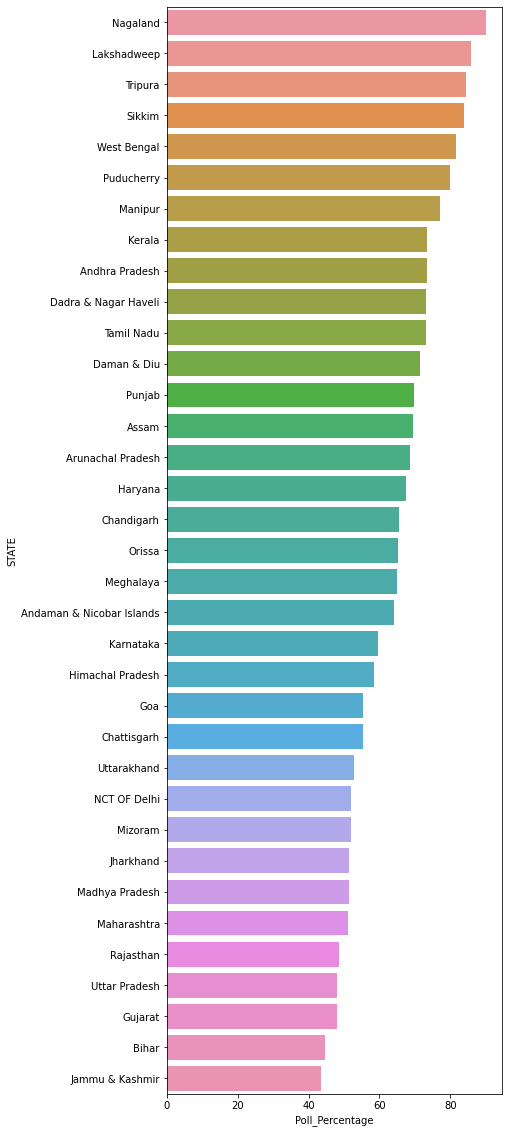

In [11]:
import seaborn as sns

# Mean statistics of all the states
poll_percentage = electors_2009.groupby('STATE').mean()

# Creating a dictionary of states and poll percentage
polls = poll_percentage[['POLL PERCENTAGE']].sort_values('POLL PERCENTAGE',ascending = False).to_dict()

# States and their poll percentage
states = list(polls['POLL PERCENTAGE'].keys())
state_percentage = list(polls['POLL PERCENTAGE'].values())

# Creating a dataframe
Data = {'STATE':states,'Poll_Percentage':state_percentage}
DF = pd.DataFrame(data=Data)

# Generating a bar plot
ax = plt.subplots(figsize=(6, 20))

sns.barplot(x=DF.Poll_Percentage,y=DF.STATE)

### Insight : Four out of the top five states with respect to polling percentages are a part of the north-east India which is considered to be amongst the least developed parts of India.

## Task 5 : Plot a bar plot to compare the seats won by different parties in Uttar Pradesh

Text(0.5, 1.0, 'UP seats comparison')

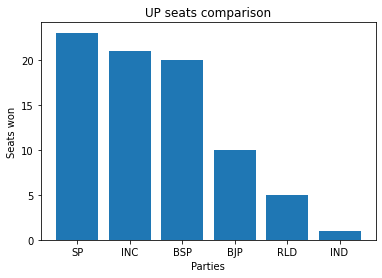

In [12]:
UP_win = candidate_2009[(candidate_2009['Position'] == 1.0) & (candidate_2009['State_name'] == 'Uttar Pradesh') ]

UP = UP_win.Party_Abbreviation.value_counts().to_dict()

plt.bar(UP.keys(),UP.values())

plt.xlabel('Parties')

plt.ylabel('Seats won')

plt.title('UP seats comparison')

### Insights : As mentioned earlier regional parties have major influencies, the highest number of seats won in UP are by Samajwadi Party(SP). Also Bahujan Samaj Party(BSP) is trailing behind INC only by a few seats.

## Task 6 : Plot a stacked bar chart to compare the number of seats won by different `Alliances` in Gujarat,Madhya Pradesh and Maharashtra. 

(array([0, 1, 2]),
 [Text(0, 0, 'Gujarat'),
  Text(1, 0, 'Madhya Pradesh'),
  Text(2, 0, 'Maharashtra')])

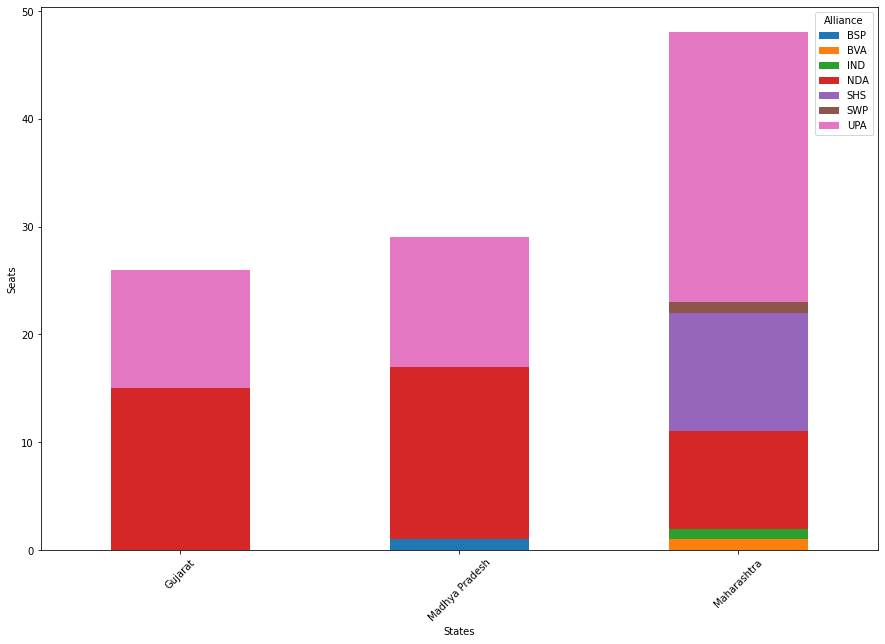

In [13]:
# Subset of winner candidates
winner = candidate_2009[candidate_2009.Position == 1]

# Subset the the dataset for the states of Gujarat, Maharashtra and Madhya Pradesh
states = winner[(winner.State_name == 'Gujarat') | (winner.State_name == 'Maharashtra') | (winner.State_name == 'Madhya Pradesh')]

# Grouping the states by alliances
states.groupby('State_name')['Alliance'].count()

# Stacked bar chart
states.groupby(['State_name', 'Alliance']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,10))

plt.xlabel('States')

plt.ylabel('Seats')

plt.xticks(rotation = 45)

### Insight : Maharashtra is dynamic state with various parties winning seats in the election with UPA getting the highest seats followed by NDA.

## Task 7 : Plot a grouped bar chart to compare the number of winner candidates on the basis of their caste in the states of Andhra Pradesh, Kerala, Tamil Nadu and Karnataka

[Text(0, 0, 'ADMK'),
 Text(1, 0, 'AIMIM'),
 Text(2, 0, 'CPI'),
 Text(3, 0, 'CPM'),
 Text(4, 0, 'JD(S)'),
 Text(5, 0, 'KEC(M)'),
 Text(6, 0, 'MDMK'),
 Text(7, 0, 'MUL'),
 Text(8, 0, 'NDA'),
 Text(9, 0, 'TDP'),
 Text(10, 0, 'TRS'),
 Text(11, 0, 'UPA')]

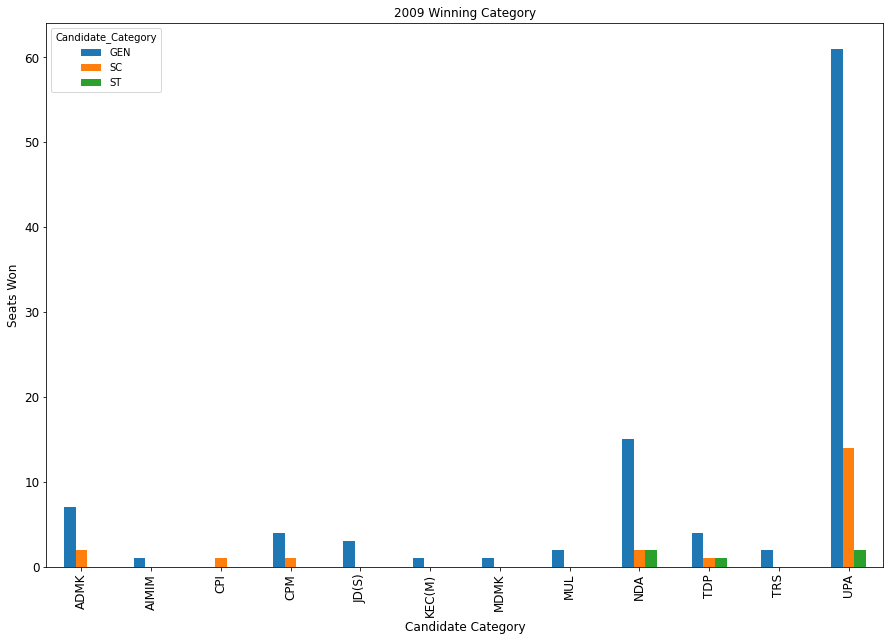

In [15]:
# Subset containing data of the given states
cat = candidate_2009[(candidate_2009.State_name == 'Andhra Pradesh') | (candidate_2009.State_name == 'Kerala') | (candidate_2009.State_name == 'Tamil Nadu') | (candidate_2009.State_name == 'Karnataka')]

# Subset the data with the winner of each constituency of the mentioned states
cat = cat[cat.Position == 1]

# Group the data according to `Alliance` and `Candidate_Category`
cat = cat.groupby(['Alliance','Candidate_Category'])['Position'].sum().unstack().reset_index()

# Plotting a grouped bar chart
nx = cat.plot(kind='bar', title ="2009 Winning Category", figsize=(15, 10), legend=True, fontsize=12)
nx.set_xlabel("Candidate Category", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)

# Modifying Axis Labels
labels = [item.get_text() for item in nx.get_xticklabels()]
labels[0:12] = cat['Alliance']

nx.set_xticklabels(labels)

### Insight :Most of the winner candidates are from general category with UPA having the highest number of SC candidates.

## Task 8 : Plot a horizontal bar graph of the Parliamentary constituency with total voters less than 100000

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

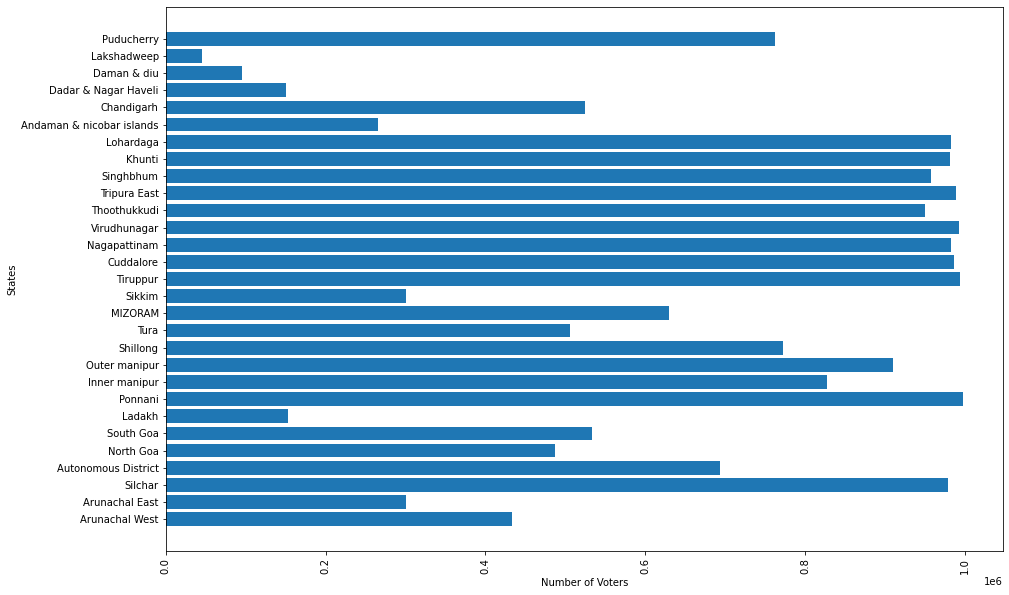

In [16]:
# Constituency with less than 100000 voters
voters = electors_2009[electors_2009.Total_Electors < 1000000]

# Plot a horizontal bar graph to compare constituencies with less than 1000000 voters
plt.figure(figsize=(15,10))

plt.barh(voters['PARLIAMENTARY CONSTITUENCY']  ,voters.Total_Electors)

plt.xlabel('Number of Voters')

plt.ylabel('States')

plt.xticks(rotation = 90)

### Insight : Lakshadweep, Daman & Diu, Dadra & Nagar Haveli and Ladakh have less than 20000 electors.

## Task 9: Plot a pie chart with the top 10 parties with majority seats in the elections

(-1.1324296122098951,
 1.1015442714170582,
 -1.1023350197623656,
 1.1263438506116112)

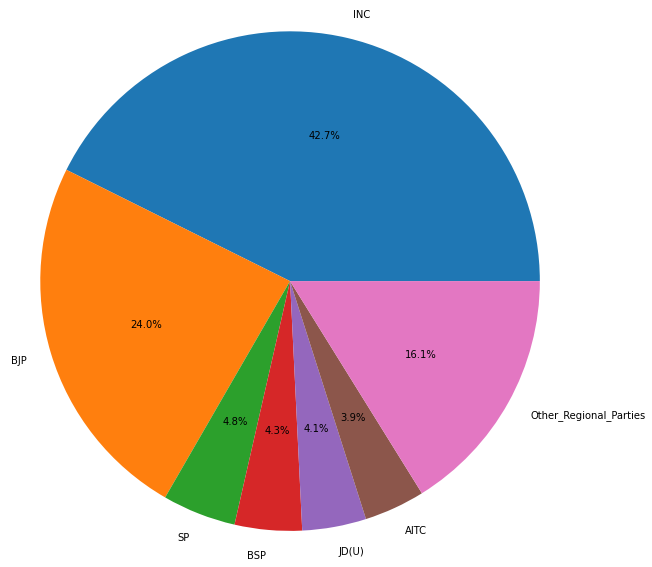

In [17]:
# Candidates with 1st position in their respective constituiency
winner = candidate_2009[candidate_2009.Position == 1]

# Find the parties with the number of seats won by them 
final = winner.Party_Abbreviation.value_counts()[:6].to_dict()

# count of other regional parties
final['Other_Regional_Parties'] = sum(winner.Party_Abbreviation.value_counts()) - sum(winner['Party_Abbreviation'].value_counts()[:10])

# Pie chart
plt.figure(figsize = (10,10))
plt.pie(final.values(),labels= final.keys(), autopct='%1.1f%%')
plt.axis('equal')


### Insight : INC have won almost 43 % of the total seats followed by BJP with 24% seats.

## Task 10 : Plot a pie diagram for top 9 states with most number of seats

(-1.1000000018504719,
 1.1000000000881176,
 -1.1123490182454578,
 1.103987165368062)

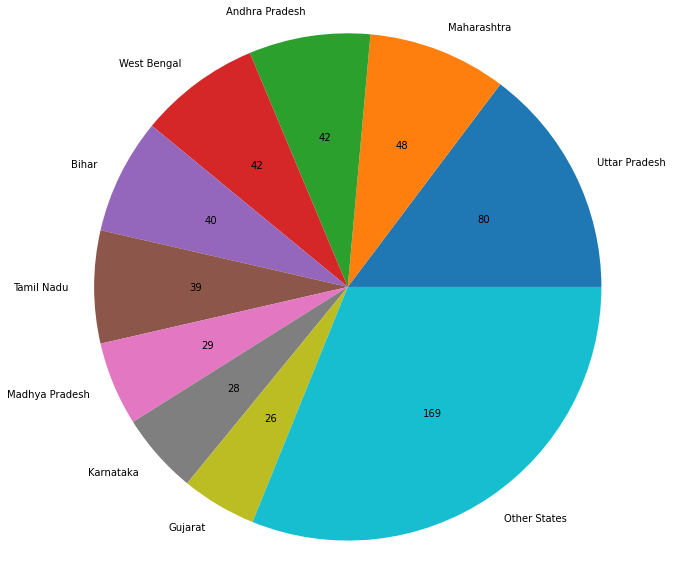

In [18]:
# Top 9 states with maximum number of seats
seats = electors_2009.STATE.value_counts()[:9].to_dict()

# Sum of other states
seats['Other States'] = electors_2009.STATE.value_counts().sum() - electors_2009.STATE.value_counts()[:9].sum()

# Function to convert percentages into actual values
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

values = autopct_format(seats.values())

# PLotting the pie chart
plt.figure(figsize=(10,10))

plt.pie(x=seats.values(),labels = seats.keys(), autopct=values)

plt.axis('equal')

### As can be seen Uttar Pradesh has the highest number of seats(80) followed by Maharashtra(48).